In [1]:
import sklearn
from sklearn.neural_network import MLPClassifier
import  sklearn.datasets as d
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
diabetes = d.load_breast_cancer()

In [4]:
data = pd.DataFrame(diabetes.data, columns= diabetes.feature_names)

In [5]:
data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [6]:
datat = data.copy()

In [7]:
datat['target'] = diabetes.target

In [8]:
datat

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [9]:
X = data
y = datat.target

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state=42, shuffle = False)

In [11]:
mlp = MLPClassifier(hidden_layer_sizes=(1000,1000),
    activation='relu', # other options: 'logistic', 'tanh'
    solver='adam', # other options: 'sgd', 'lbfgs'
    alpha=0.0001, # L2 penalty (regularization term) parameter
    batch_size='auto', # 'auto' sets batch_size to min(200, n_samples)
    learning_rate='constant', # other options: 'invscaling', 'adaptive'
    learning_rate_init=0.001, # initial learning rate
    power_t=0.5,
    max_iter=200,
    shuffle=True,
    random_state=None, # set an integer for reproducible results
    tol=0.0001, # tolerance for the optimization
    verbose=True, # to print the progress messages
    warm_start=False,
    momentum=0.9,# used only when solver='sgd'
    nesterovs_momentum=True, # used only when solver='sgd' and momentum > 0
    early_stopping=True) # whether to use early stopping to terminate training when validation score is not improving

In [19]:
nn = mlp.fit(X_train, y_train)

Iteration 1, loss = 17.53957061
Validation score: 0.418605
Iteration 2, loss = 21.08063627
Validation score: 0.418605
Iteration 3, loss = 20.62372435
Validation score: 0.581395
Iteration 4, loss = 14.50011832
Validation score: 0.581395
Iteration 5, loss = 9.89611491
Validation score: 0.418605
Iteration 6, loss = 13.50243643
Validation score: 0.418605
Iteration 7, loss = 16.38097106
Validation score: 0.767442
Iteration 8, loss = 3.69100429
Validation score: 0.744186
Iteration 9, loss = 7.35293868
Validation score: 0.813953
Iteration 10, loss = 4.17446948
Validation score: 0.976744
Iteration 11, loss = 2.71780374
Validation score: 0.627907
Iteration 12, loss = 5.14000518
Validation score: 0.883721
Iteration 13, loss = 1.79839588
Validation score: 0.883721
Iteration 14, loss = 2.63456983
Validation score: 0.860465
Iteration 15, loss = 2.71073145
Validation score: 0.953488
Iteration 16, loss = 1.22436811
Validation score: 0.906977
Iteration 17, loss = 2.04110747
Validation score: 0.930233


In [ ]:
r_a = mlp.score(X_test,y_test)
r_a

0.9090909090909091

In [15]:
p_r_a = mlp.predict(X_test)

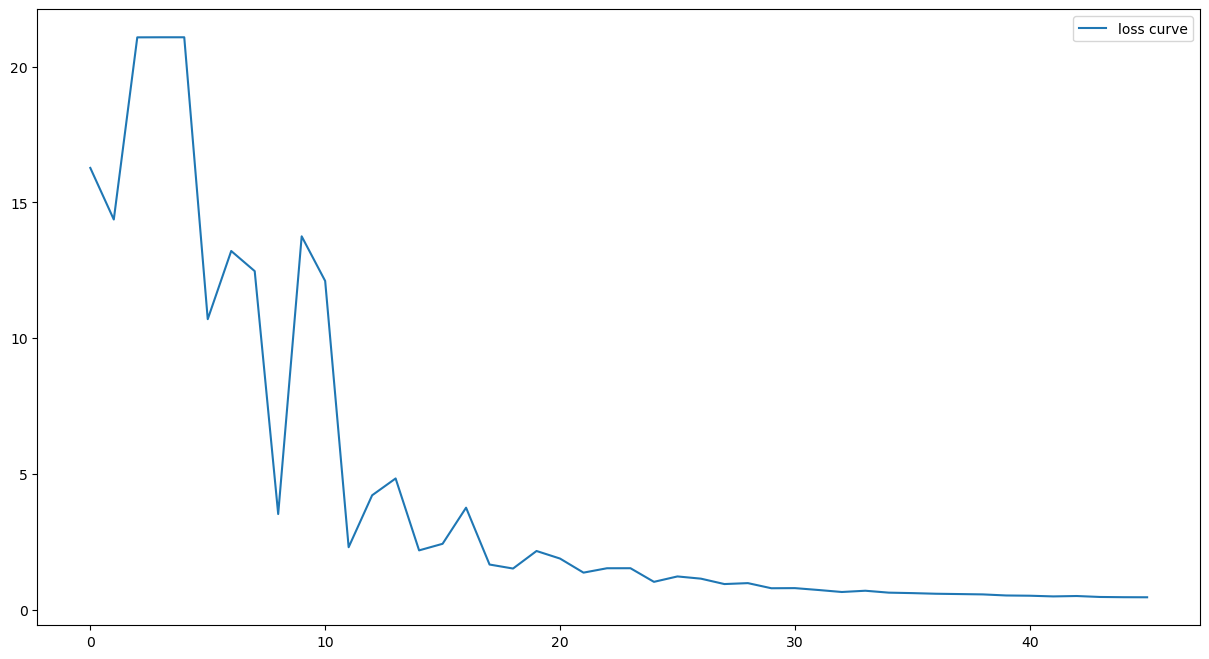

In [16]:
plt.figure(figsize=(15,8))
sns.lineplot(nn.loss_curve_)
labels = ['loss curve']
plt.legend(labels)

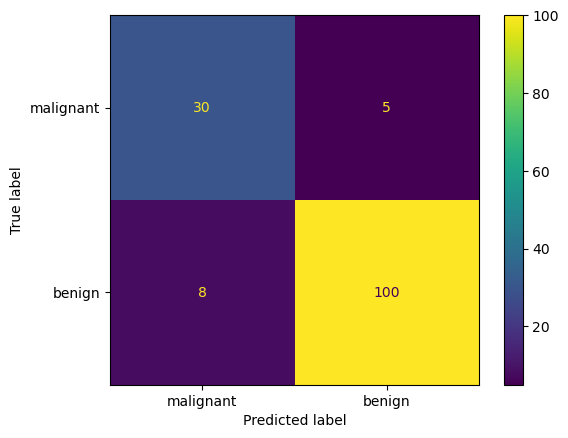

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
cm = confusion_matrix( y_test, p_r_a)
ConfusionMatrixDisplay(cm,display_labels=diabetes.target_names).plot()

Text(0.5, 1.0, 'Confusion Matrix')

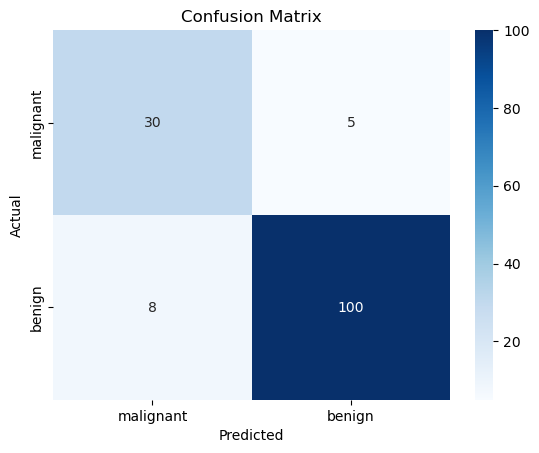

In [21]:
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=diabetes.target_names, yticklabels=diabetes.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')